<a href="https://colab.research.google.com/github/ShokufehKhani/Life-Expectancy-Prediction/blob/main/Life_Expectancy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expectency Prediction

### import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

### Variable Descriptions
#### Format: variable (type) - description

* country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)

* year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

* status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

* life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year

* adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

* infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

* alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

* percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

* hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

* measles (Ratio) - number of reported Measles cases per 1000 population

* bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

* under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

* polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

* total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

* diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

* hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

* gdp (Ratio) - Gross Domestic Product per capita

* population (Ratio) - population of a country

* thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)

* thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9

* income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
schooling (Ratio) - average number of years of schooling of a population - ICOR measures how good a country is at utilizing its resources.

### setting the style of the notebook to be monokai theme  

In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme = 'oceans16', context = 'notebook', ticks = True, grid = False)

**This line of code is important to ensure that we are able to see the x and y axes clearly**
**If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.**

### Perform Exploratory Data Analysis and Visualization

#### Read the csv file

In [ ]:
life_expectancy_df = pd.read_csv('Life Expectancy Data.csv')

#### Remove spaces from column names

In [ ]:
life_expectancy_df.columns = life_expectancy_df.columns.str.strip()

#### Display 5 top rows

In [ ]:
life_expectancy_df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

#### Display 5 borttom rows

In [ ]:
life_expectancy_df.tail()

Country  Year      Status  Life expectancy  Adult Mortality  \
2933  Zimbabwe  2004  Developing             44.3            723.0   
2934  Zimbabwe  2003  Developing             44.5            715.0   
2935  Zimbabwe  2002  Developing             44.8             73.0   
2936  Zimbabwe  2001  Developing             45.3            686.0   
2937  Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
2933             27     4.36                     0.0         68.0       31   
2934             26     4.06                     0.0          7.0      998   
2935             25     4.43                     0.0         73.0      304   
2936             25     1.72                     0.0         76.0      529   
2937             24     1.68                     0.0         79.0     1483   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  thinness  1-19 years  thinness 5-9 years  \
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      Income composition of resources  Schooling  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[5 rows x 22 columns]

#### Display summary statistics

In [ ]:
life_expectancy_df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

### Comprehensive Analysis of Dataset Variables

##### BMI interpretaion
* Mean BMI of 38.32 indicates a tendency towards "Obesity (Class II)" on average.
* Wide spread, as indicated by standard deviation, reflects variability in BMI values.
* Minimum BMI of 1 suggests a potential error or outlier, requiring further investigation.
* Maximum BMI of 87.3 also raises concerns as an extreme outlier, necessitating careful validation.
* Addressing outliers is crucial for accurate interpretation and understanding the dataset's overall distribution.

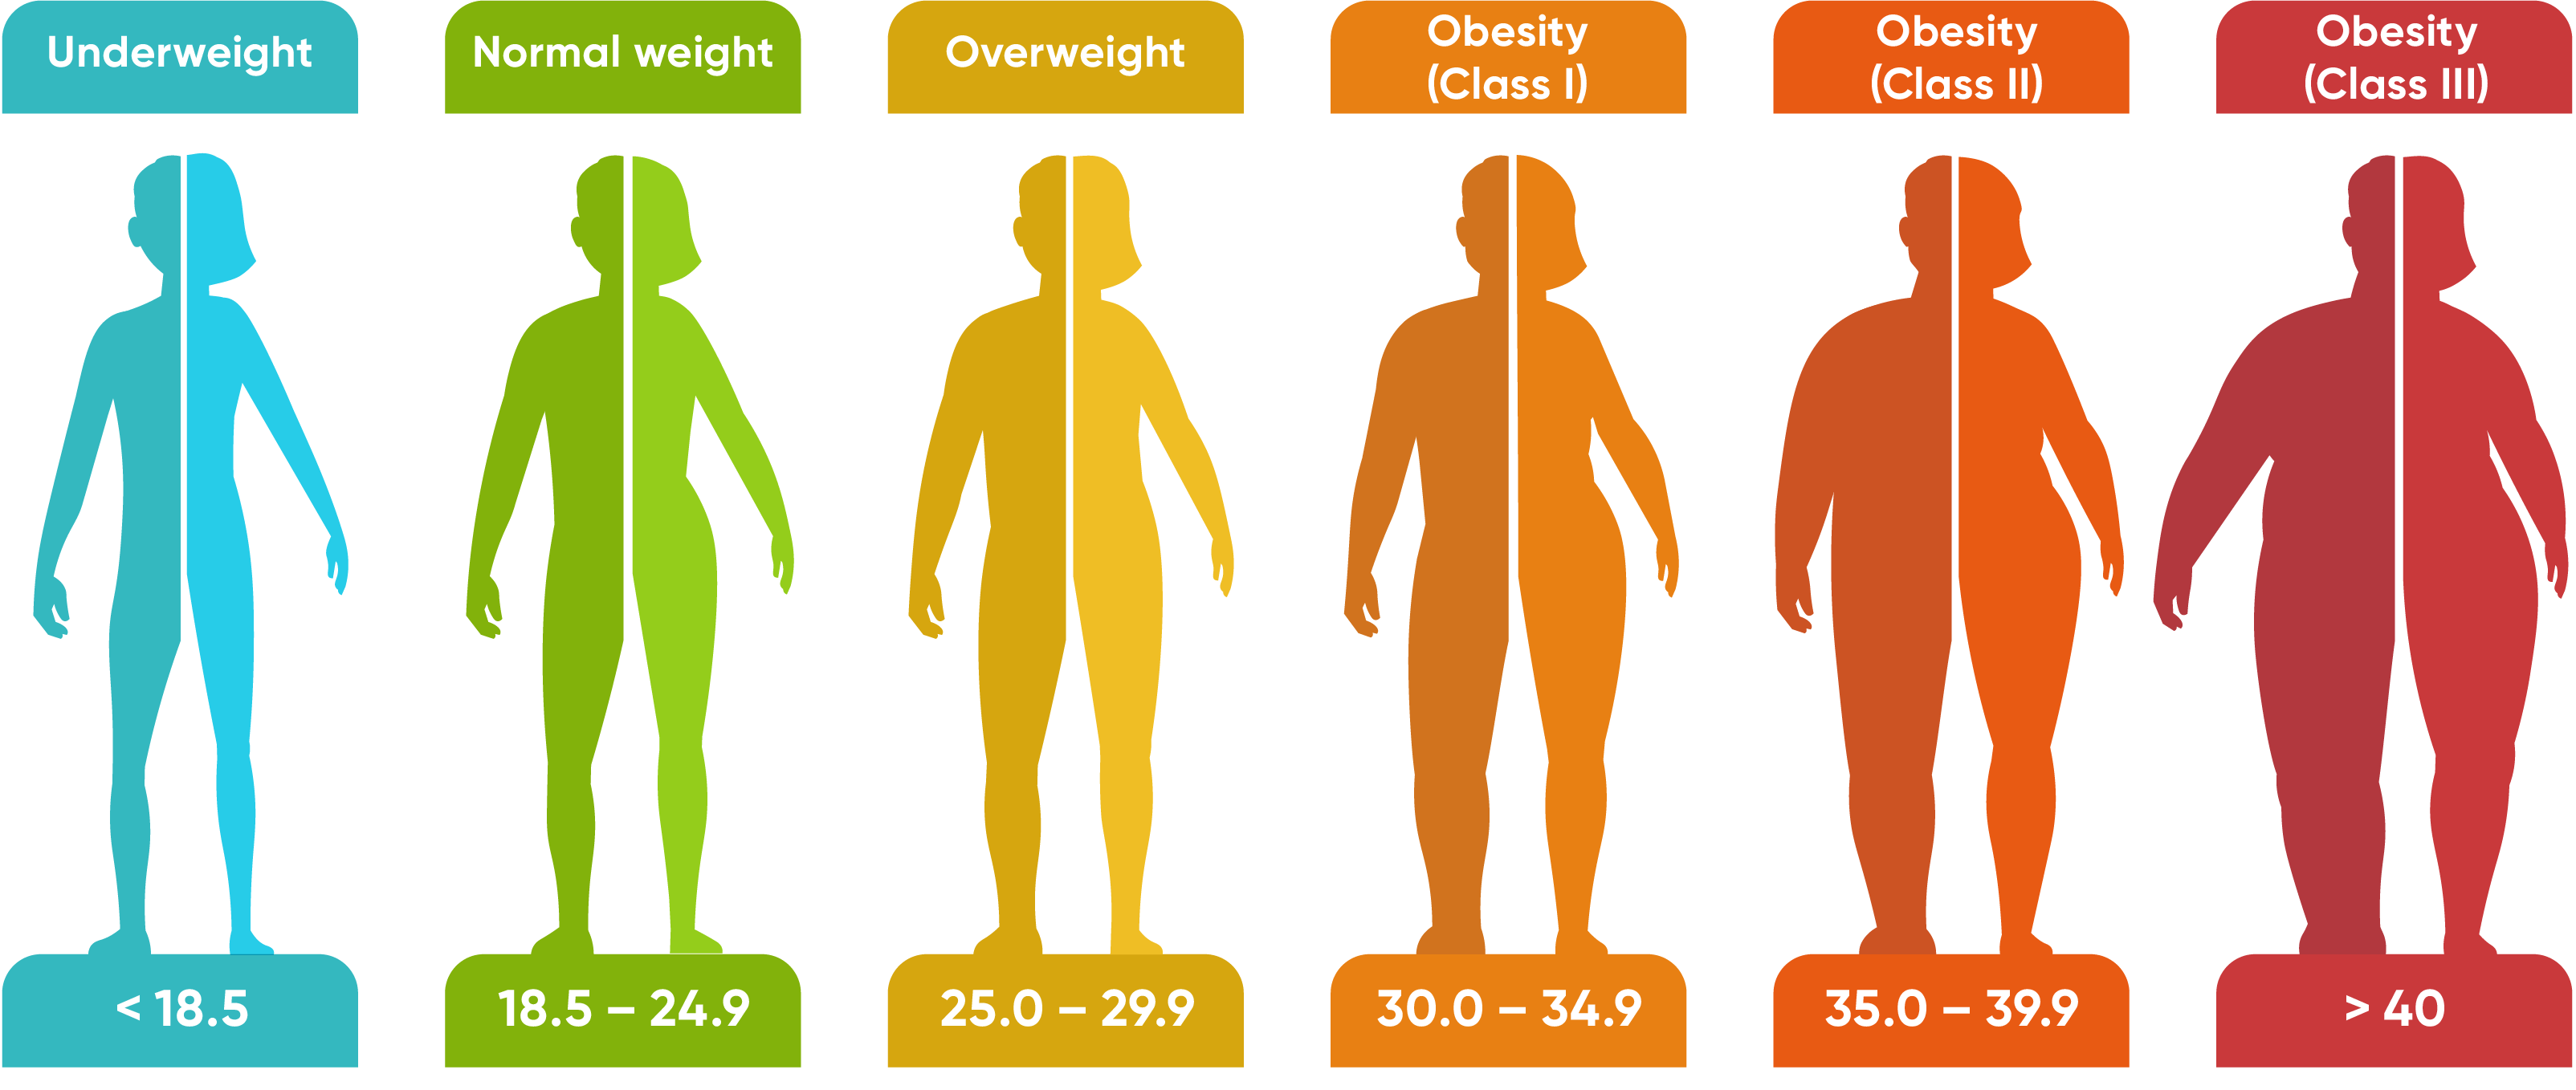

In [ ]:
from IPython.display import Image, display

# Specify the file path of your image
image_path = 'BMI.png'

# Display the image
display(Image(filename=image_path))

##### Adult Mortality interpretaion
* Mean adult mortality rate of 164.79 suggests a moderate average risk of dying before 60.
*
High variability, with a standard deviation of 124.29, indicates diverse mortality rates
*
Minimum rate of 1 may be an error, while the maximum of 723 needs careful validation as an extre value.
* The dataset et aligns with WHO's definition of adult mortality, emphasizing irelevance.
* Scrutinizing outliers is essential for precise interpretation and a comprehensive view of mortality patterns.rns.

##### Infant deaths interpretaion
* Mean infant deaths ratio of 30.30 implies an average of 30.30 infant deaths per 1000 population.
* High variability, with a standard deviation of 117.92, indicates diverse infant mortality ratios.
* The minimum ratio of 0 suggests that some areas or observations reported no infant deaths.
* The maximum ratio of 1800 raises concerns as an extreme outlier, necessitating careful validation.
* Scrutinizing outliers is crucial for accurate interpretation and understanding the distribution of infant mortality ratios.ios.atios.atios.

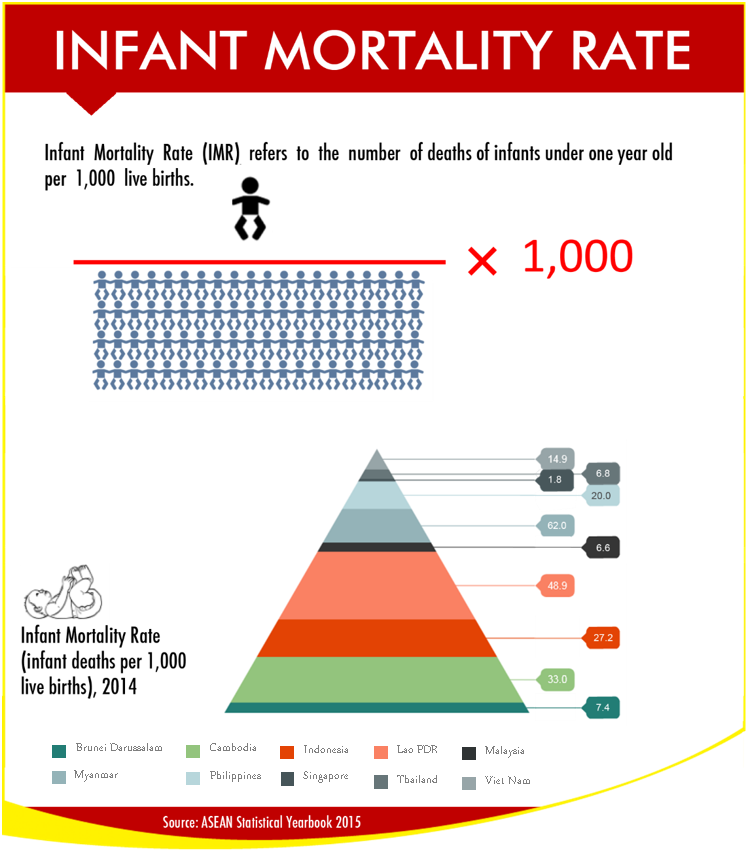

In [ ]:
from IPython.display import Image, display

# Specify the file path of your image
image_path = 'Infant-Mortality-Rate.png'

# Display the image
display(Image(filename=image_path))

##### GDP interpretaion

* The maximum GDP of 119172 indicates potential outliers, requiring validation.
* The minimum GDP of 1.68 may suggest anomalies or data errors, prompting further investigation.

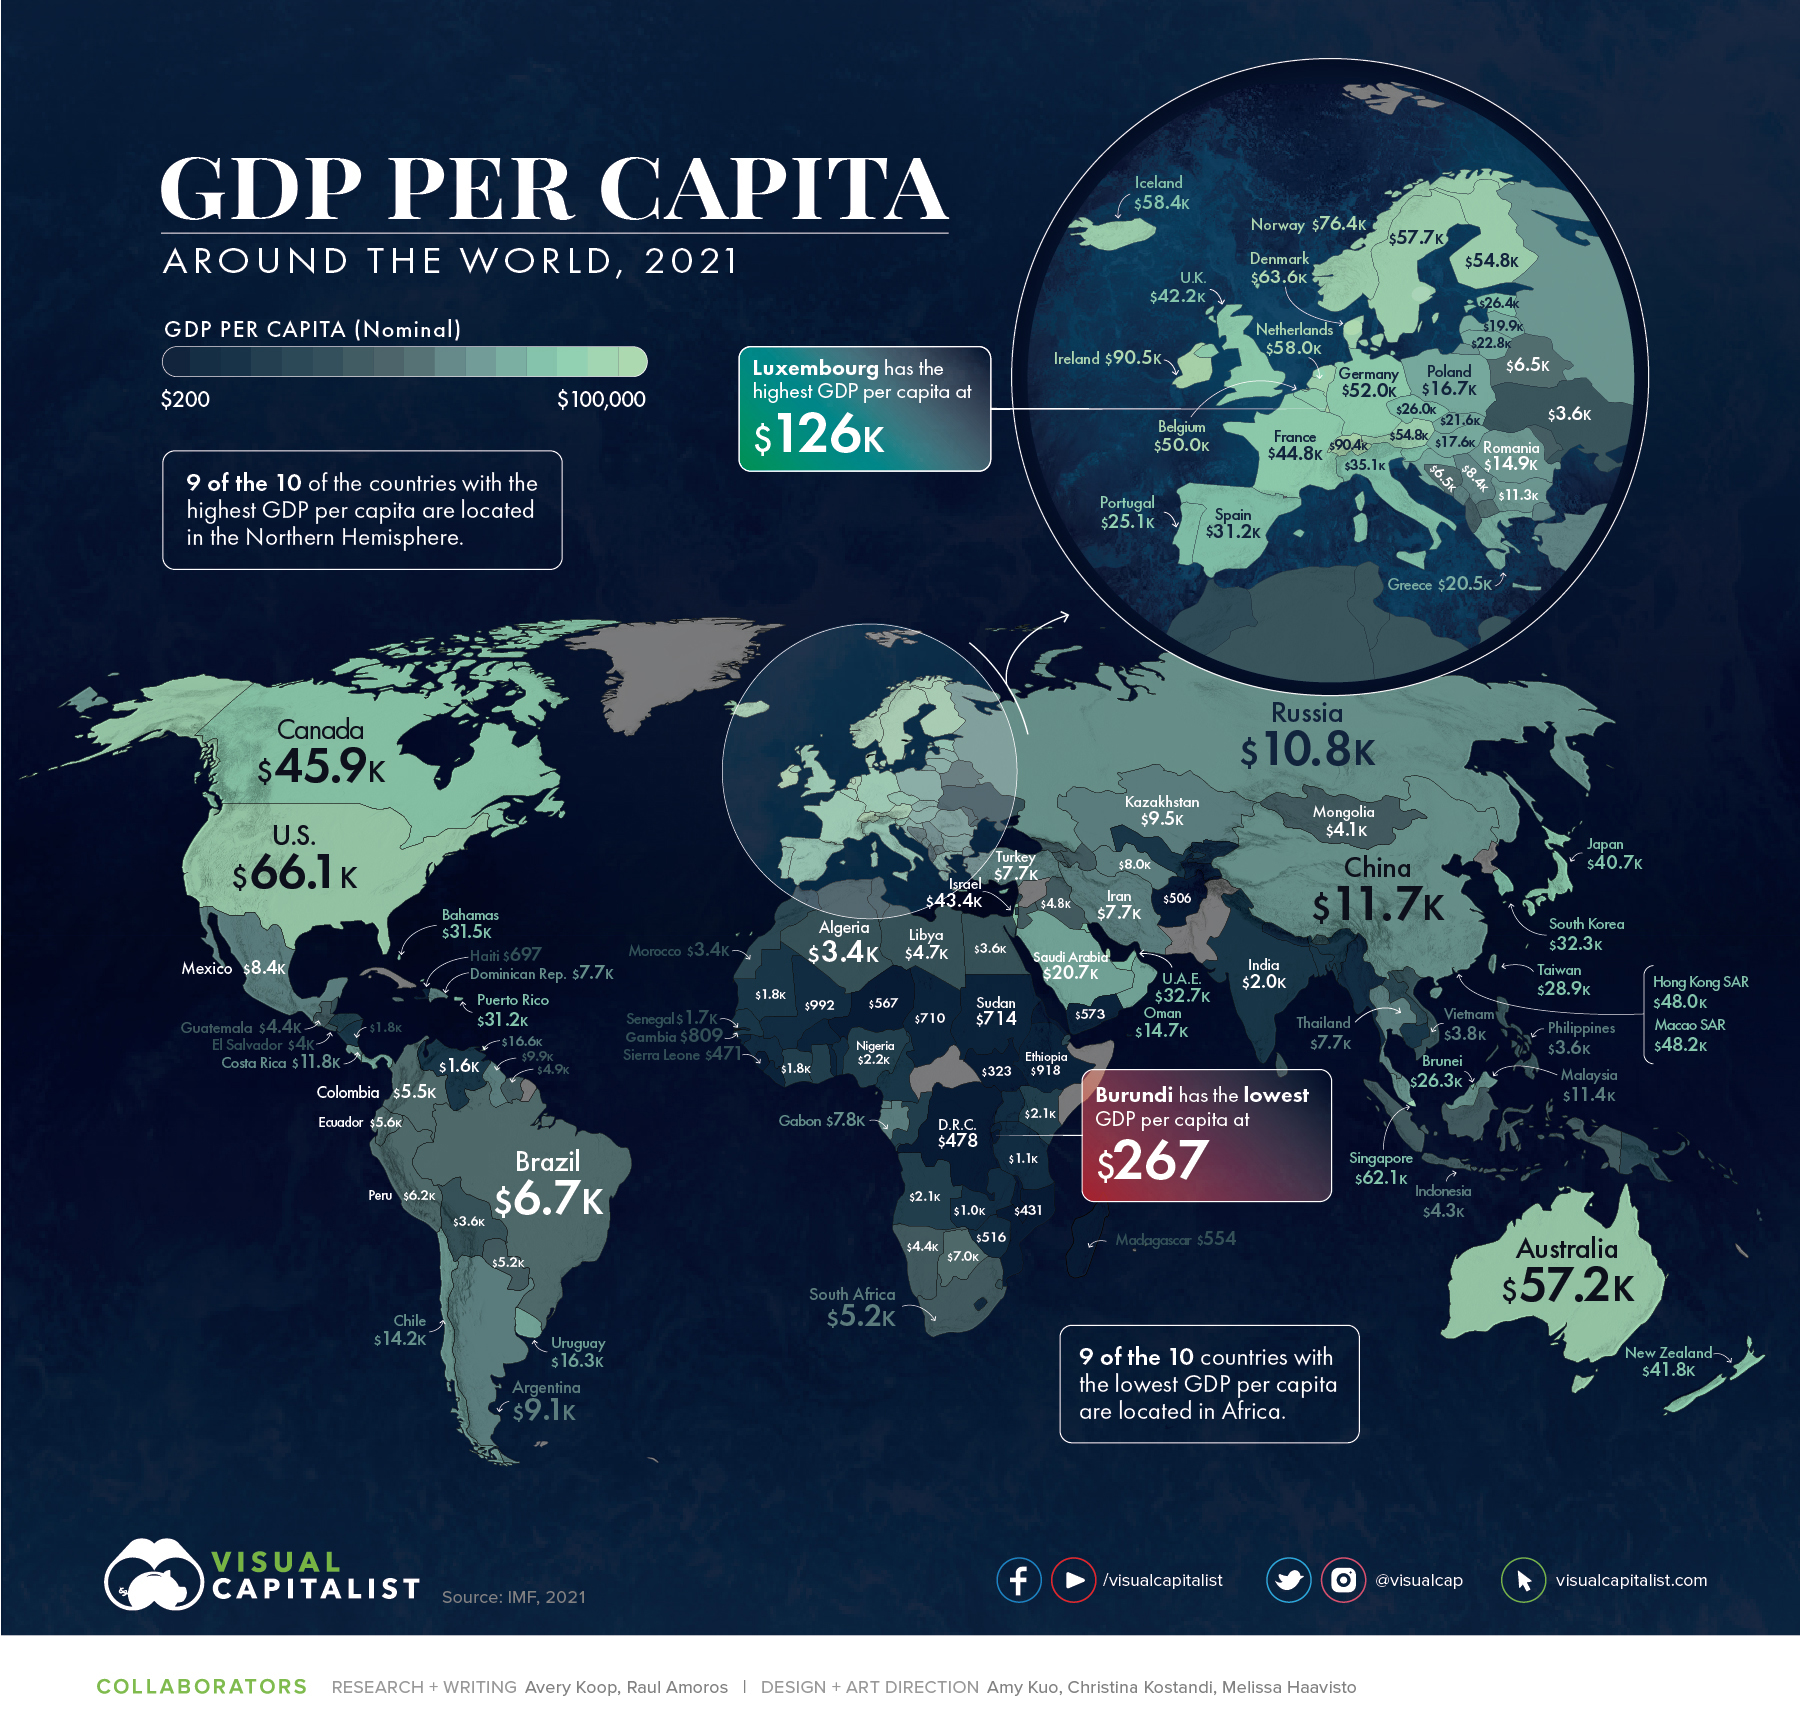

In [ ]:
from IPython.display import Image, display

# Specify the file path of your image
image_path = 'map-gdp-per-capita-large.jpg'

# Display the image
display(Image(filename=image_path))

##### Population interpretaion
* The dataset's population statistics, spanning from a minimum of 34 to a maximum of 1.29 billion, highlight substantial variability in demographic profiles.
* Despite the mean population of 12.7 million indicating a moderate average, the high standard deviation (61 million) signifies significant diversity among countries or regions.
* Considering both the extreme maximum value of 1.29 billion and the low minimum value of 34 as potential outliers, careful validation is crucial to ensure data accuracy and identify anomalies in the dataset.

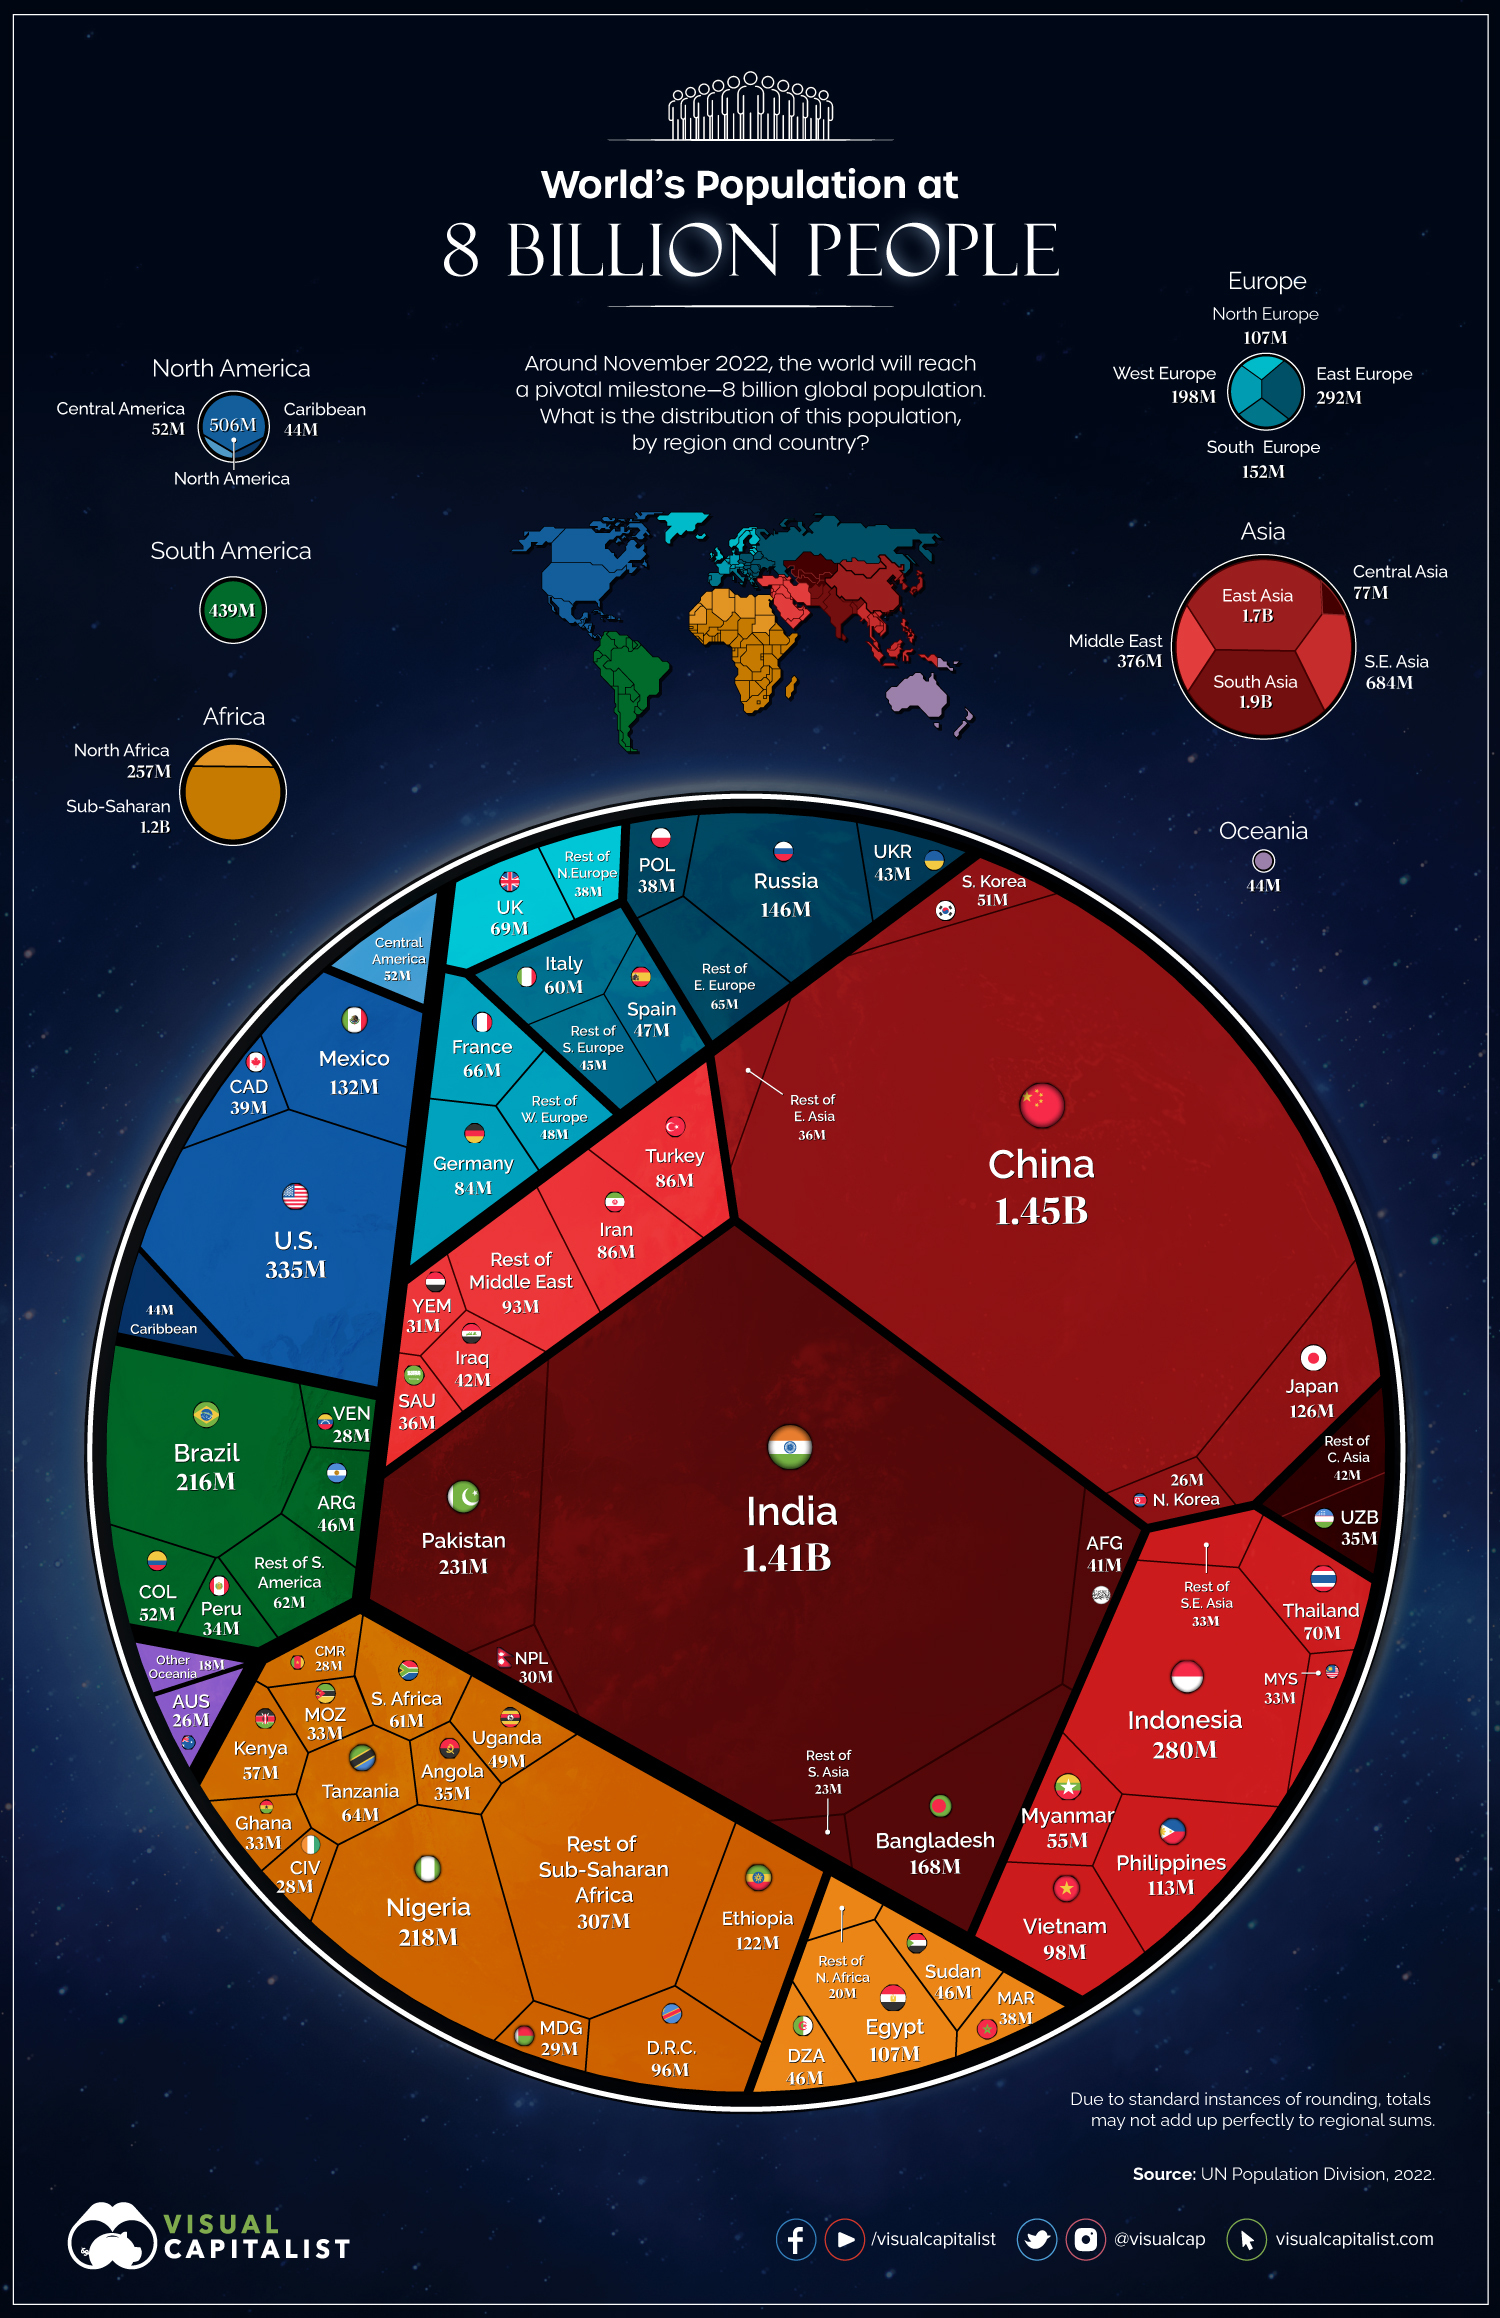

In [ ]:
from IPython.display import Image, display

# Specify the file path of your image
image_path = 'world-population-at-8-billion.jpg'

# Display the image
display(Image(filename=image_path))

#### Display Index, Column names and Non-null Count

In [ ]:
info_data = []
for col in life_expectancy_df.columns:
    dtype = life_expectancy_df[col].dtype
    non_null_count = life_expectancy_df[col].count()
    info_data.append([col, dtype, non_null_count])

info_df = pd.DataFrame(info_data, columns=['Column', 'Data Type', 'Non-null Count'])
display(info_df)

Column Data Type  Non-null Count
0                           Country    object            2938
1                              Year     int64            2938
2                            Status    object            2938
3                   Life expectancy   float64            2928
4                   Adult Mortality   float64            2928
5                     infant deaths     int64            2938
6                           Alcohol   float64            2744
7            percentage expenditure   float64            2938
8                       Hepatitis B   float64            2385
9                           Measles     int64            2938
10                              BMI   float64            2904
11                under-five deaths     int64            2938
12                            Polio   float64            2919
13                Total expenditure   float64            2712
14                       Diphtheria   float64            2919
15                         HIV/AIDS   float64            2938
16                              GDP   float64            2490
17                       Population   float64            2286
18             thinness  1-19 years   float64            2904
19               thinness 5-9 years   float64            2904
20  Income composition of resources   float64            2771
21                        Schooling   float64            2775

#### Checking for missing values

In [ ]:
null_counts = life_expectancy_df.isnull().sum()
null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])
display(null_counts_df)

Null Count
Country                                   0
Year                                      0
Status                                    0
Life expectancy                          10
Adult Mortality                          10
infant deaths                             0
Alcohol                                 194
percentage expenditure                    0
Hepatitis B                             553
Measles                                   0
BMI                                      34
under-five deaths                         0
Polio                                    19
Total expenditure                       226
Diphtheria                               19
HIV/AIDS                                  0
GDP                                     448
Population                              652
thinness  1-19 years                     34
thinness 5-9 years                       34
Income composition of resources         167
Schooling                               163

#### Show missing values in each column using **heatmap**

<Axes: >

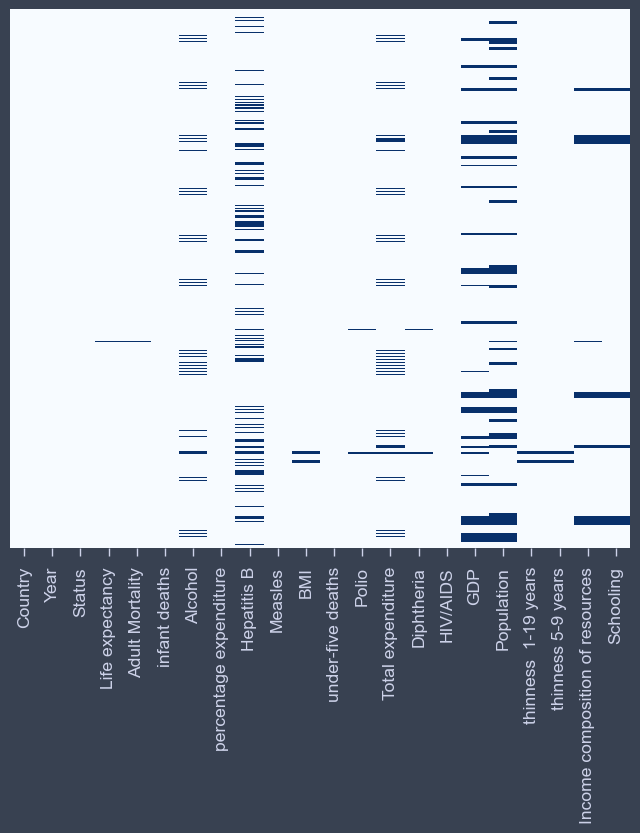

In [ ]:
# check if there are any Null values
sns.heatmap(life_expectancy_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

#### Plot a bar chart of missing values (All columns)

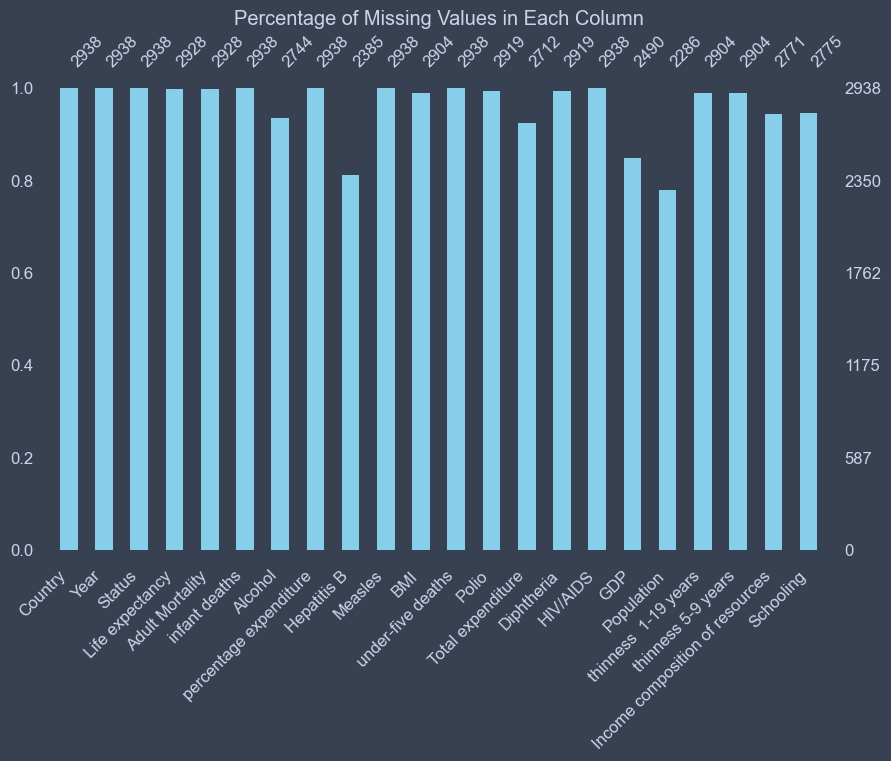

In [ ]:
import missingno as msno

msno.bar(life_expectancy_df, figsize=(10, 6), color='skyblue', fontsize=12)
plt.title("Percentage of Missing Values in Each Column")
plt.show()

#### Plot a bar chart of missing values (Columns with missing values)

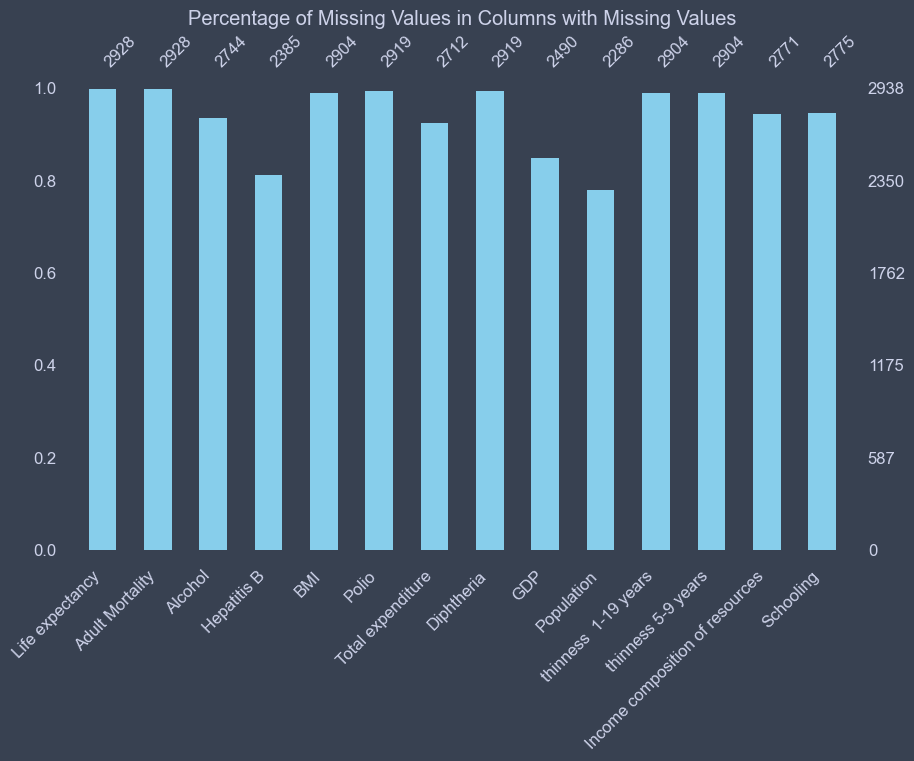

In [ ]:
# Filter columns with missing values
columns_with_missing_values = life_expectancy_df.columns[life_expectancy_df.isnull().any()]

# Create a bar chart of missing values for selected columns
msno.bar(life_expectancy_df[columns_with_missing_values], figsize=(10, 6), color='skyblue', fontsize=12)
plt.title("Percentage of Missing Values in Columns with Missing Values")
plt.show()

#### Number and Percentage of Missing values by column

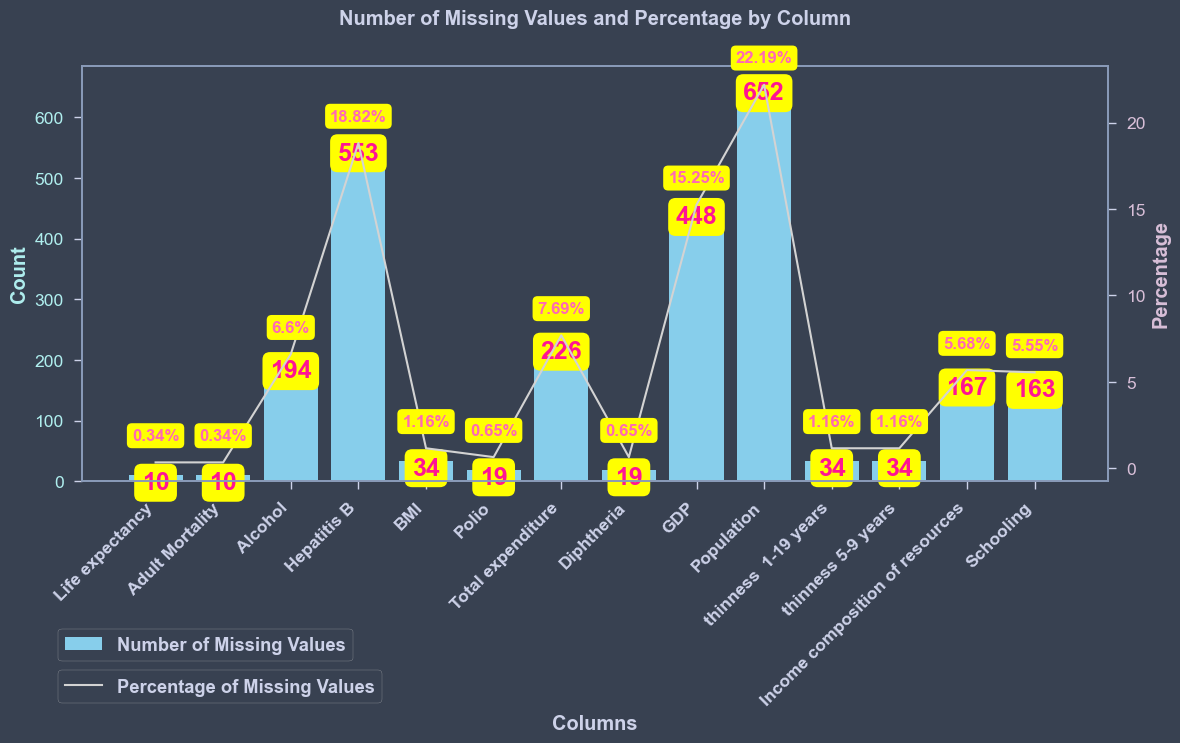

In [ ]:
from matplotlib.font_manager import FontProperties


missing_values = life_expectancy_df.isnull().sum()
missing_values = missing_values[missing_values != 0]

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(life_expectancy_df)) * 100

# Create a bar chart for the count of missing values
fig, ax1 = plt.subplots(figsize=(12, 9))

# Bar for the number of missing values
bar1 = ax1.bar(missing_values.index, missing_values, color='skyblue', label='Number of Missing Values')

ax1.set_xlabel('Columns', fontweight='bold')  # Set fontweight for x-axis label
ax1.set_ylabel('Count', color='paleturquoise', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='paleturquoise')
ax1.set_title('Number of Missing Values and Percentage by Column', pad=30, fontweight='bold')  # Adjust pad for space

# Display the values on top of the bars with adjusted vertical positioning
for bar in bar1:
    yval = bar.get_height()
    # Add a background color to the text
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * max(missing_values), round(yval, 2),
             ha='center', va='top', color='deeppink', fontsize=18, fontweight='bold', bbox=dict(facecolor='yellow', edgecolor='none', boxstyle='round'))

# Create a second y-axis for the percentage of missing values using a line chart
ax2 = ax1.twinx()
line2 = ax2.plot(missing_percentage.index, missing_percentage, linestyle='-', color='lightgray', label='Percentage of Missing Values')


ax2.set_ylabel('Percentage', color='thistle', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='thistle')

# Display the values on top of the line chart with adjusted vertical positioning
for i, value in enumerate(missing_percentage):
    # Add a background color to the text
    ax2.text(missing_percentage.index[i], value + 0.05 * max(missing_percentage), f'{round(value, 2)}%',
             ha='center', va='bottom', color='hotpink', fontsize=12, fontweight='bold', bbox=dict(facecolor='yellow', edgecolor='none', boxstyle='round'))

# Set x-axis ticks and labels
ax1.set_xticks(np.arange(len(missing_values)))
ax1.set_xticklabels(missing_values.index, rotation=45, ha='right', fontweight='bold')

# Display both legends outside the chart below the x-axis with some space
legend_font = FontProperties(weight='bold')  # Create FontProperties object for legend
ax1_legend = ax1.legend(loc='lower left', bbox_to_anchor=(-0.05, -0.5), borderaxespad=1.5, prop=legend_font)
ax2_legend = ax2.legend(loc='lower left', bbox_to_anchor=(-0.05, -0.6), borderaxespad=1.5, prop=legend_font)

plt.tight_layout()
plt.show()


#### Dealing with Missing Values

It looks like there are a lot of columns containing null values, since this is time series data assorted by country, the best course of action would be to interpolate the data by country. However, when attempting to interpolate by country it doesn't fill in any values as the countries' data for all the null values are null for each year, therefore imputation by year may be the best possible method here. Imputation of each year's mean is done below.

In [ ]:
imputed_data = []

for year in life_expectancy_df['Year'].unique():
    year_data = life_expectancy_df[life_expectancy_df['Year'] == year].copy()

    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()

    imputed_data.append(year_data)

life_expectancy_df = pd.concat(imputed_data).copy()

In [ ]:
# Verifying null-values after applying above methods.
null_counts = pd.DataFrame(life_expectancy_df.isnull().sum(), columns=['Null Count'])
display(null_counts)

Null Count
Country                                   0
Year                                      0
Status                                    0
Life expectancy                           0
Adult Mortality                           0
infant deaths                             0
Alcohol                                   0
percentage expenditure                    0
Hepatitis B                               0
Measles                                   0
BMI                                       0
under-five deaths                         0
Polio                                     0
Total expenditure                         0
Diphtheria                                0
HIV/AIDS                                  0
GDP                                       0
Population                                0
thinness  1-19 years                      0
thinness 5-9 years                        0
Income composition of resources           0
Schooling                                 0

#### Checking for Ouliers

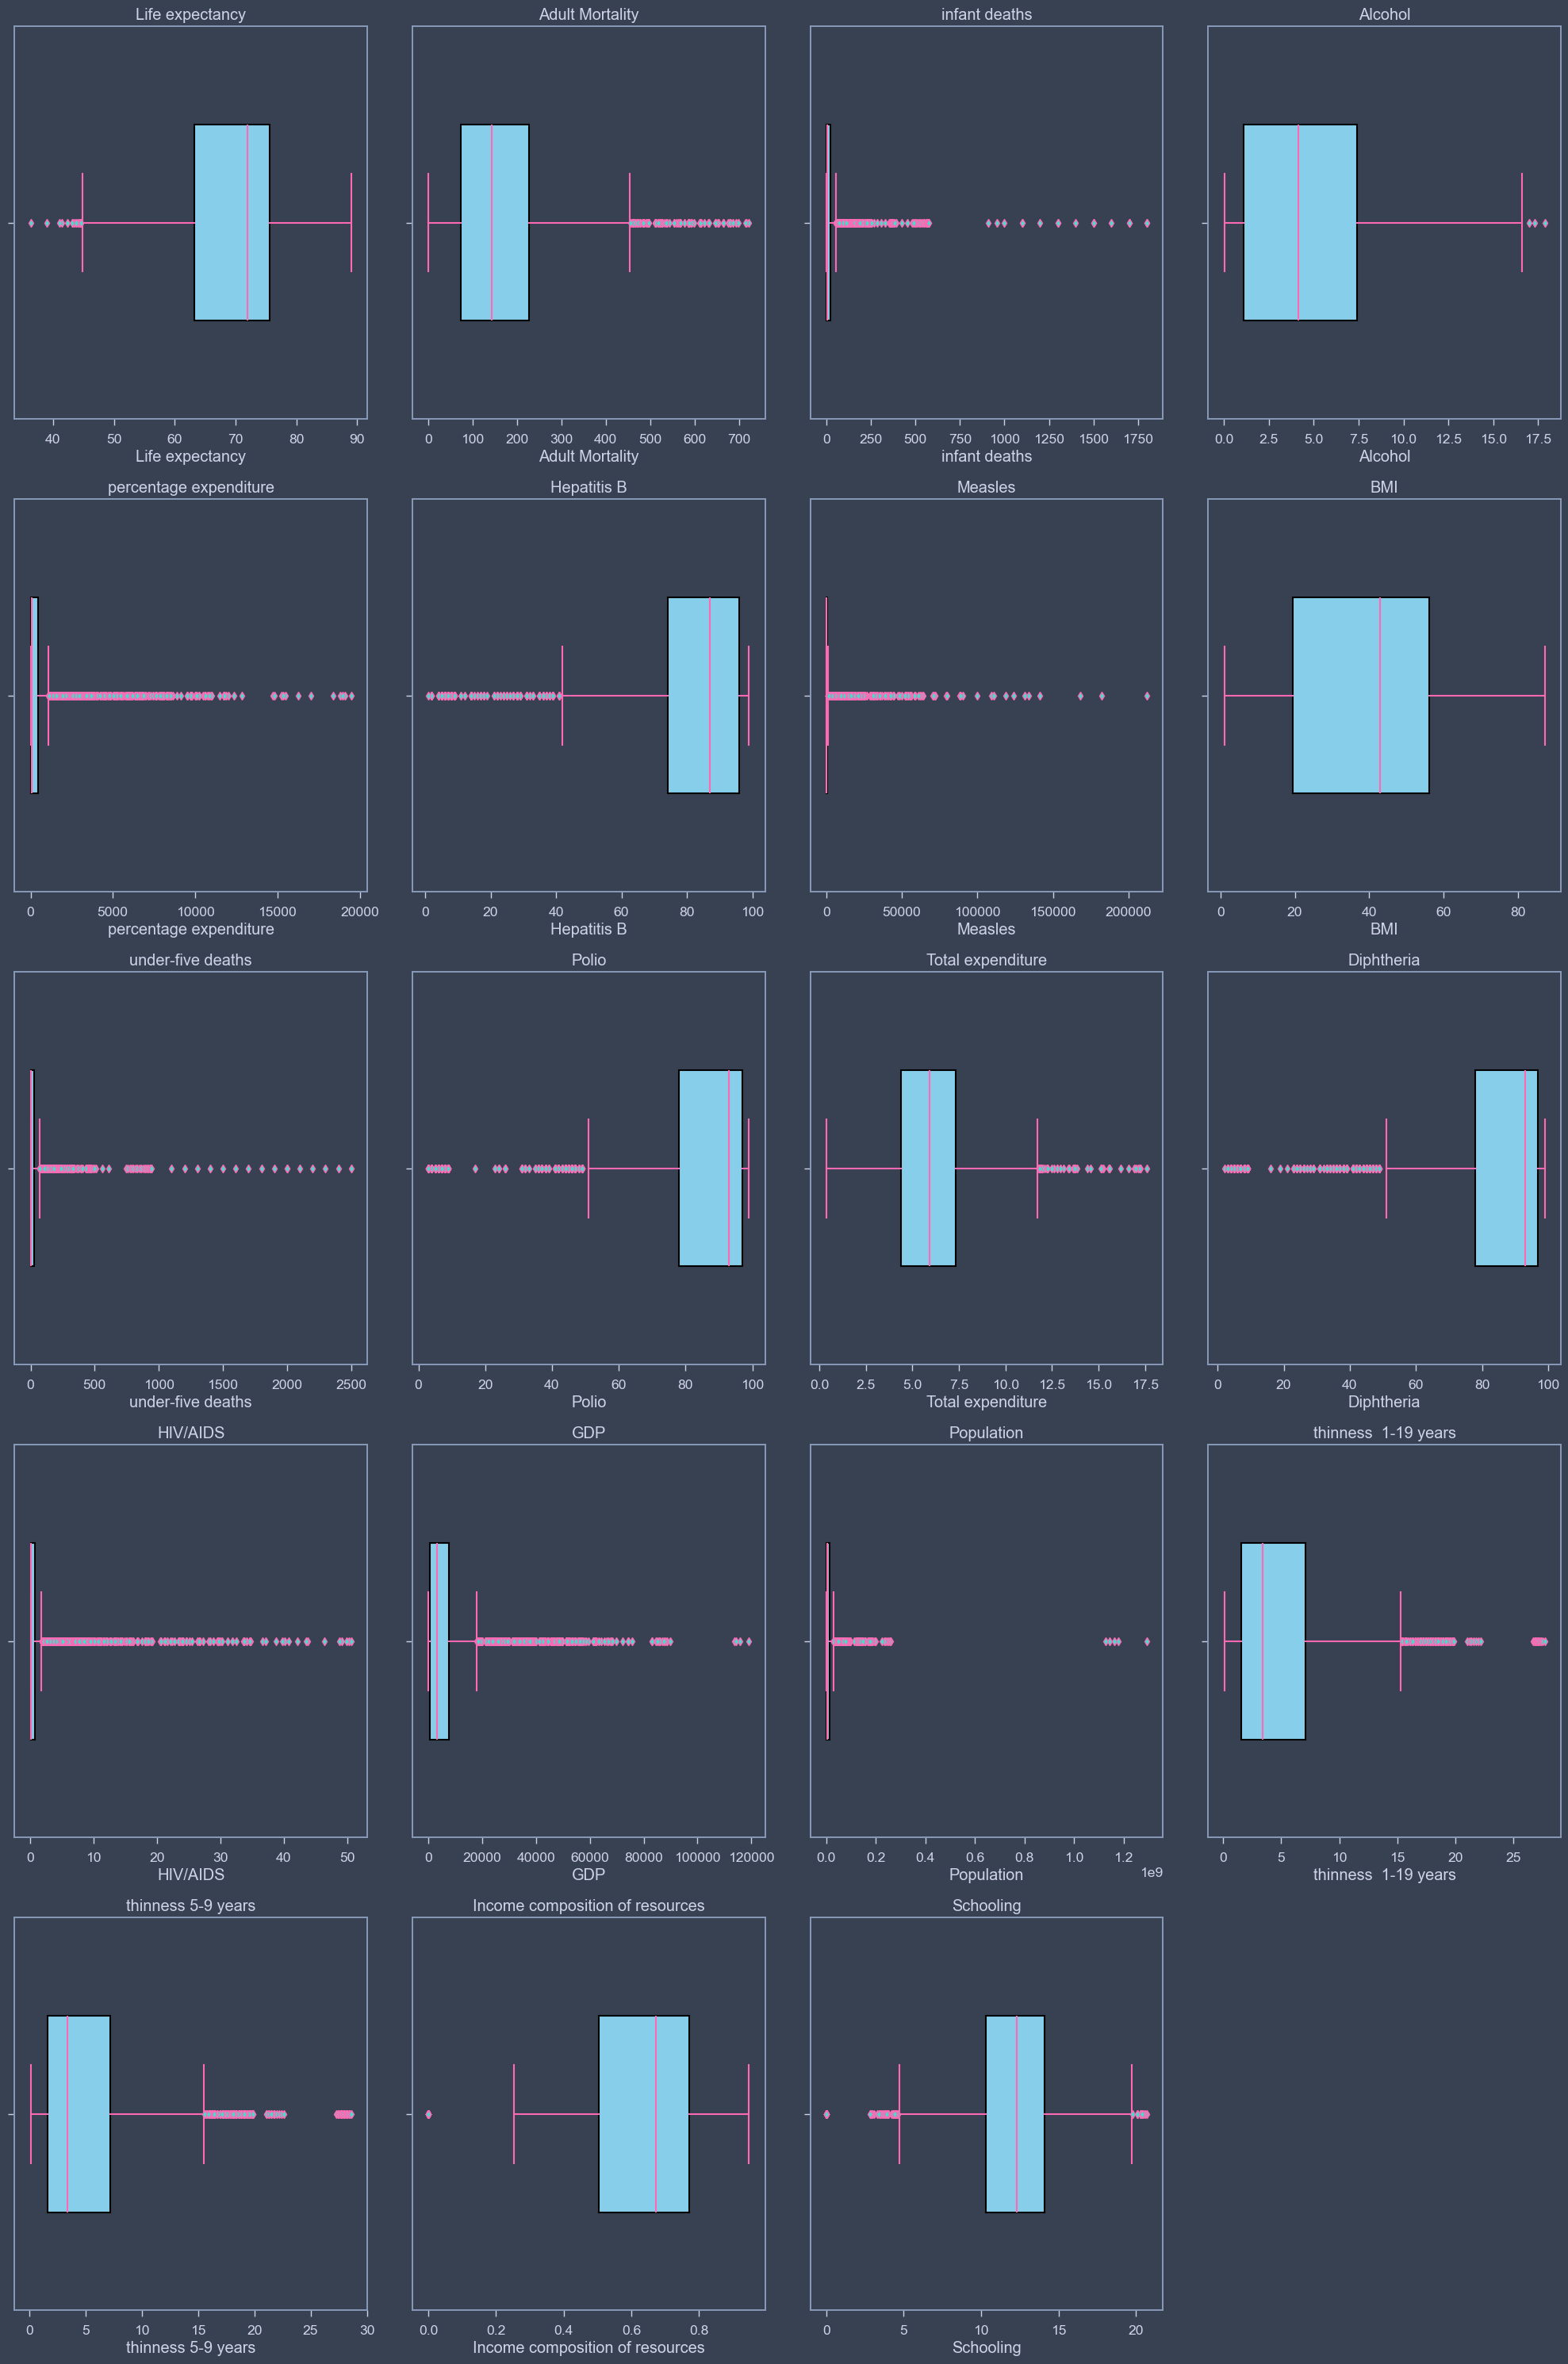

In [ ]:
# Create a dictionary of columns.
col_dict = {'Life expectancy': 1, 'Adult Mortality': 2,
            'infant deaths': 3, 'Alcohol': 4, 'percentage expenditure': 5, 'Hepatitis B': 6,
            'Measles': 7, 'BMI': 8, 'under-five deaths': 9, 'Polio': 10, 'Total expenditure': 11,
            'Diphtheria': 12, 'HIV/AIDS': 13, 'GDP': 14, 'Population': 15, 'thinness  1-19 years': 16,
            'thinness 5-9 years': 17, 'Income composition of resources': 18, 'Schooling': 19}

# Create a figure and axis
plt.figure(figsize=(20, 30))
i = 1  # Initialize subplot index

# Iterate through the columns
for key, value in col_dict.items():
    plt.subplot(5, 4, i)

    # Use Seaborn boxplot with custom color for all elements
    sns.boxplot(x=life_expectancy_df[key], color="skyblue", width=0.5, linewidth=1.5,
                boxprops=dict(facecolor='skyblue', edgecolor='black'),
                whiskerprops=dict(color='hotpink'),
                capprops=dict(color='hotpink'),
                flierprops=dict(markerfacecolor='turquoise', markeredgecolor='hotpink'),
                medianprops=dict(color='hotpink'))

    plt.title(key)
    i += 1  # Increment subplot index

# Adjust layout for better spacing
plt.tight_layout()
plt.show()